<a href="https://colab.research.google.com/github/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treinamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 1) Resumo

Neste notebook foram feitos os treinamentos e seleção de hyperparamentros de 6 modelos de **ML** distintos. Os modelos estudados foram:

* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* Random Forest Tree
* Support Vector Machine
* KNeighbors

A busca pelos hyperparametros foram feitas pelo GridSearchCV ou pelo RandomizedSearchCV. Para a Cross Validation foi usado **RepeatedStratifiedKFold** com **5** divições de **10** repetições. Quando RandomizedSearchCV foi utilizado foi feita uma busca de 20 tentativas do espaço de **hyperparametros**. Por tanto ao total temos 1000 (5x10x20) treinamentos por modelo.

O parametro utilizado para avaliação do modelo foi **ROC_AUC** e quantidade de **falsos negativos** (FN).

A base aqui utiliza foi a que a variaveis esxplicativas foram escolhidas utilizando apenas o criterio de correlção, a seleção foi feita neste [Notebook](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/10acc58f00f060385488c782c9ae2d2e6d404c08/Notebooks/Selecao_variaveis/selecao_variaveis.ipynb). Essa base tem **351** amostras com **41** variaveis explicativas. Dessas **351** amostras **315** foram usados para **Cross Validation** (treino + teste) e **36** foram usados para a **validação**.

Os hyperparamentros seleciona por modelos foram:

* DummyClassifier
    >* strategy : [stratified, most_frequent, prior, uniform]
    
* LogisticRegression
    >* C : [0, 4]
    
* DecisionTreeClassifier
    >* max_depth       : [1-20]
    >* criterion       : [gini, entropy]
    >* min_samples_leaf: [1-5]
    >* max_leaf_nodes  : [2-5]
    
* Random Forest Tree
    >* n_estimators    : [100, 150, 200, 250, 300, 350, 400]
    >* max_depth       : [1, 20]    
    >* criterion       : [gini, entropy]
    >* min_samples_leaf: [1-5]
    >* max_leaf_nodes  : [2-10]
    
* Support Vector Machine
    >* kernel        : [linear, poly, rbf, sigmoid]
    >* C             : [0, 2]
    >* gamma         : [scale, auto]
    >* shrinking     : [True , False]

* KNeighbors
    >* n_neighbors   : [1, 10]
    >* p             : [1, 2]
    >* weights       : [uniform, distance]
    >* algorithm     : [auto, ball_tree, kd_tree, brute]
    
Os hyperparametros podem ser encontrado no arquivo python [aqui](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/10acc58f00f060385488c782c9ae2d2e6d404c08/src/hyperparametros.py).

---
# 2) Pre-analise

---
## 2.1) Minhas Funções

In [1]:
# Maquina Local 
maquina_local = True

if (maquina_local):
    import sys
    sys.path.insert(1, "../../")

    from src.plota_graficos import plota_curva_roc, plota_matriz_de_confusao
    from src.ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos,\
                        obtem_nome_modelo
    from src.info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas
    import src.hyperparametros as hp
# Collab
else:
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/requirements.txt"
   !pip3 install -r requirements.txt
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/plota_graficos.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/ml.py"
   !curl -O "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/src/info.py"

   from plota_graficos import plota_curva_roc, plota_matriz_de_confusao
   from ml import retorna_x_y, intervalo_de_confianca, treina_modelo_grid_search_cv, treina,\
                        treina_modelo_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split, desempenho_dos_modelos,\
                        obtem_nome_modelo

   from info import proporcao_y, numero_teste_treino_val, resultados_treinamento, dimensao_dados, variaveis_explicativas

---
## 2.2) Importando libs

In [2]:
import pandas as pd
#
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#
import matplotlib.pyplot as plt
#
import numpy as np
#
from scipy.stats import uniform
#
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
#


## 2.3) Versão dos bibilotecas

In [3]:
import sklearn as sk
import scipy   as sc
import matplotlib as mpl

print(f'scipy      : {sc.__version__}')
print(f'sklearn    : {sk.__version__}')
print(f'pandas     : {pd.__version__}')
print(f'numpy      : {np.__version__}')
print(f'matplotlib : {mpl.__version__}')

scipy      : 1.6.2
sklearn    : 0.24.2
pandas     : 1.2.4
numpy      : 1.20.2
matplotlib : 3.3.4


---
# 3) Lendo os dados

In [4]:
seed     = 1471523

In [5]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"
#path = "../../Dados/Tratados/dados_sem_corr_acima_do_valor_de_corte.csv"
dados = pd.read_csv(path)

dimensao_dados(dados)

dados.tail(n=5)

Numero de linhas : 351 
Numero de colunas: 42 


,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,ICU
346,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,0.142857,0.736842,-0.418803,-1.0,-1.0,-1.0,-1.0,-1.000000,1
347,1,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,-0.059524,0.526316,-0.589744,-1.0,-1.0,-1.0,-1.0,-0.619048,0
348,0,-0.111111,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.457627,-0.071429,0.894737,-0.299145,-1.0,-1.0,-1.0,-1.0,-1.000000,1
349,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.661017,-0.107143,0.736842,-0.247863,-1.0,-1.0,-1.0,-1.0,-1.000000,0
350,0,-0.111111,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.525424,0.535714,0.789474,-0.299145,-1.0,-1.0,-1.0,-1.0,-1.000000,0


In [6]:
dados.describe()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,-0.046534,0.381766,0.108262,0.022792,0.091168,0.019943,0.128205,0.045584,0.196581,...,-0.468207,0.097772,0.760029,-0.313074,-0.948718,-0.949522,-0.955764,-0.949053,-0.953398,0.461538
std,0.499002,0.640366,0.486513,0.311155,0.149453,0.288259,0.140004,0.334795,0.208879,0.397980,...,0.213326,0.272230,0.116880,0.185592,0.140561,0.144820,0.138641,0.162552,0.120752,0.499230
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.954802,-0.571429,0.263158,-0.760684,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.000000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.593220,-0.107143,0.684211,-0.418803,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.000000,-0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.525424,0.071429,0.789474,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.389831,0.250000,0.842105,-0.213675,-1.000000,-0.987730,-0.984733,-1.000000,-0.976190,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.830508,0.964286,1.000000,0.487179,0.200000,0.411043,0.511450,0.529412,-0.071429,1.000000


In [7]:
dados.var()

AGE_ABOVE65                     0.249003
AGE_PERCENTIL                   0.410068
GENDER                          0.236695
DISEASE GROUPING 1              0.096817
DISEASE GROUPING 2              0.022336
DISEASE GROUPING 3              0.083093
DISEASE GROUPING 4              0.019601
DISEASE GROUPING 5              0.112088
DISEASE GROUPING 6              0.043630
HTN                             0.158388
IMMUNOCOMPROMISED               0.136410
OTHER                           0.153114
ALBUMIN_MEDIAN                  0.021494
BE_VENOUS_MEDIAN                0.016445
BLAST_MEDIAN                    0.011581
FFA_MEDIAN                      0.027523
GGT_MEDIAN                      0.021724
HEMATOCRITE_MEDIAN              0.051190
LACTATE_MEDIAN                  0.701347
LEUKOCYTES_MEDIAN               0.024965
LINFOCITOS_MEDIAN               0.023452
P02_VENOUS_MEDIAN               0.016495
PCR_MEDIAN                      0.058183
PLATELETS_MEDIAN                0.044053
POTASSIUM_MEDIAN

> Pode-se obeserva que não há nenhuma colunas com uma **variancia** maior que **0.01** como esperado.

In [8]:
_ = variaveis_explicativas(dados)

 col[  0] -> AGE_ABOVE65                         col[  1] -> AGE_PERCENTIL                       
 col[  2] -> GENDER                              col[  3] -> DISEASE GROUPING 1                  
 col[  4] -> DISEASE GROUPING 2                  col[  5] -> DISEASE GROUPING 3                  
 col[  6] -> DISEASE GROUPING 4                  col[  7] -> DISEASE GROUPING 5                  
 col[  8] -> DISEASE GROUPING 6                  col[  9] -> HTN                                 
 col[ 10] -> IMMUNOCOMPROMISED                   col[ 11] -> OTHER                               
 col[ 12] -> ALBUMIN_MEDIAN                      col[ 13] -> BE_VENOUS_MEDIAN                    
 col[ 14] -> BLAST_MEDIAN                        col[ 15] -> FFA_MEDIAN                          
 col[ 16] -> GGT_MEDIAN                          col[ 17] -> HEMATOCRITE_MEDIAN                  
 col[ 18] -> LACTATE_MEDIAN                      col[ 19] -> LEUKOCYTES_MEDIAN                   
 col[ 20] -> LINFOCI

> Acima estão as 41 variaveis explicativas selecionadas para o treinamento.

### Divindido os dados em validação e Cross Valadiation (teste+treino)

In [9]:
rng = RandomState(MT19937(SeedSequence(seed)))
x_cv, x_val, y_cv, y_val = cv_val_split(dados, p_val = .10, rng=rng)

### Verificando se a proporção foi mantida 

In [10]:
proporcao_y(dados['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  52.78%
Campo 1 ->  47.22%
Proporcao do ICU
Campo 0 ->  53.97%
Campo 1 ->  46.03%


> Aqui verificamos que a proporções entre as base de dados foram mantidas.

In [11]:
numero_teste_treino_val(dados['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 36
Número total de entradas para o Cross Validation : 315


# 4) Modelo de ML

A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV/GridSearchCV **re-treina** esse modelo com o dataset completo (treino+teste). 

In [12]:
n_iter   = 20 # numero de iteração do RandomizedSearchCV
n_splits = 5  # Numero de divisões RepeatedStratifiedKFold
n_repeats= 10 # NUmero de repitões que RepeatedStratifiedKFold faz a difisão

In [13]:
melhores_metriacas_cv_por_modelo = {}

## 4.1) DummyClassifier

> Aqui será treinado do modelo **DummyClassifier**. Para o treino foi usado **GridSearchCV**. O DummyClassifier será usado como o nosso modelo 
**"baseline"**.
>* strategy : [stratified, most_frequent, prior, uniform]




In [14]:
rng = RandomState(MT19937(SeedSequence(seed)))

modelo = DummyClassifier(random_state=rng)

parameters = hp.parameters_dummy

resultados, melhor_modelo_dummy, melhores_hyperparametros  = treina_modelo_grid_search_cv(modelo,
                                                                                      x_cv,
                                                                                      y_cv,
                                                                                      parameters,
                                                                                      n_splits=n_splits,
                                                                                      n_repeats=n_repeats,
                                                                                      rng=rng)

resultados_treinamento(resultados, melhor_modelo_dummy, melhores_hyperparametros)

Fitting 50 folds for each of 4 candidates, totalling 200 fits
melhores hyperparametros : {'strategy': 'stratified'}
Melhor modelo            : DummyClassifier(random_state=RandomState(MT19937) at 0x2BD0E1E7640,
                strategy='stratified')


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'strategy': 'stratified'},0.5093,0.508149,0.066613,0.036115,0.002078,0.000688,0.002479,0.000830,1
1,{'strategy': 'most_frequent'},0.5000,0.500000,0.000000,0.000000,0.002139,0.000959,0.002598,0.001166,2
2,{'strategy': 'prior'},0.5000,0.500000,0.000000,0.000000,0.002019,0.000989,0.002459,0.000727,2
3,{'strategy': 'uniform'},0.5000,0.500000,0.000000,0.000000,0.002359,0.001212,0.002878,0.001985,2


---
## 4.2) Regressão logistica

> Aqui será treinado do modelo **LogisticRegression**.  No treino foi usado **RandomizedSearchCV** com **20** iterações. Os hyperparametros foram:
>* C             : [0, 4]


Fitting 50 folds for each of 20 candidates, totalling 1000 fits


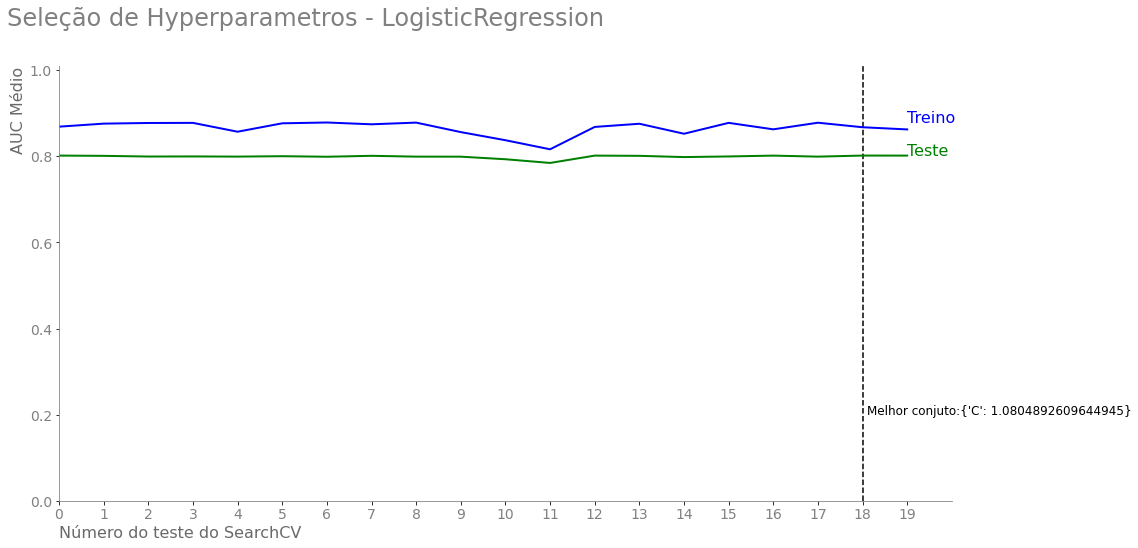

melhores hyperparametros : {'C': 1.0804892609644945}
Melhor modelo            : LogisticRegression(C=1.0804892609644945, max_iter=1000, tol=1e-06)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 1.2175467357414327},0.801765,0.868910,0.049966,0.010902,0.038187,0.010370,0.005677,0.000988,2
1,{'C': 2.456649814509979},0.801136,0.875970,0.048571,0.010825,0.045574,0.005622,0.005510,0.000725,8
2,{'C': 2.9478088496923047},0.799554,0.877476,0.049504,0.010787,0.050564,0.009011,0.005672,0.001099,12
3,{'C': 3.0573371354577636},0.799797,0.877709,0.049672,0.010820,0.050080,0.007343,0.005469,0.000840,10
4,{'C': 0.519147839425572},0.799391,0.857179,0.050389,0.010521,0.027000,0.004606,0.005913,0.001576,13
5,{'C': 2.6829570907064726},0.800325,0.876717,0.049077,0.010801,0.048604,0.008110,0.005922,0.001408,9
6,{'C': 3.423750382319948},0.799067,0.878592,0.049775,0.010792,0.059105,0.016150,0.005939,0.001547,17
7,{'C': 2.0987409147362146},0.801217,0.874427,0.048529,0.010823,0.044138,0.009948,0.005479,0.001313,6
8,{'C': 3.3105404641134117},0.799331,0.878342,0.049668,0.010842,0.053144,0.012711,0.005749,0.001058,15
9,{'C': 0.49104712889788615},0.799229,0.856297,0.050392,0.010559,0.025920,0.003311,0.005522,0.000799,16


In [15]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_logistic_regression

modelo = LogisticRegression(max_iter=1000, tol=1e-6)

melhor_modelo_lr, res, melhor_metrica = treina(modelo = modelo,
                        x = x_cv, 
                        y = y_cv, 
                        parameters = parameters, 
                        n_splits = n_splits, 
                        n_repeats = n_repeats, 
                        n_iter = n_iter, 
                        n = 10,
                        rng=rng,
                        pasta_saida_fig='fig/',
                        f_save_fig=False)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

---
## 4.3) Arvore de decissão

> Aqui será treinado do modelo **DecisionTreeClassifier**. No treino foi usado **RandomizedSearchCV** com **20** iterações. Os hyperparametros foram:
>* max_depth       : [1-20]
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-5]


Fitting 50 folds for each of 20 candidates, totalling 1000 fits


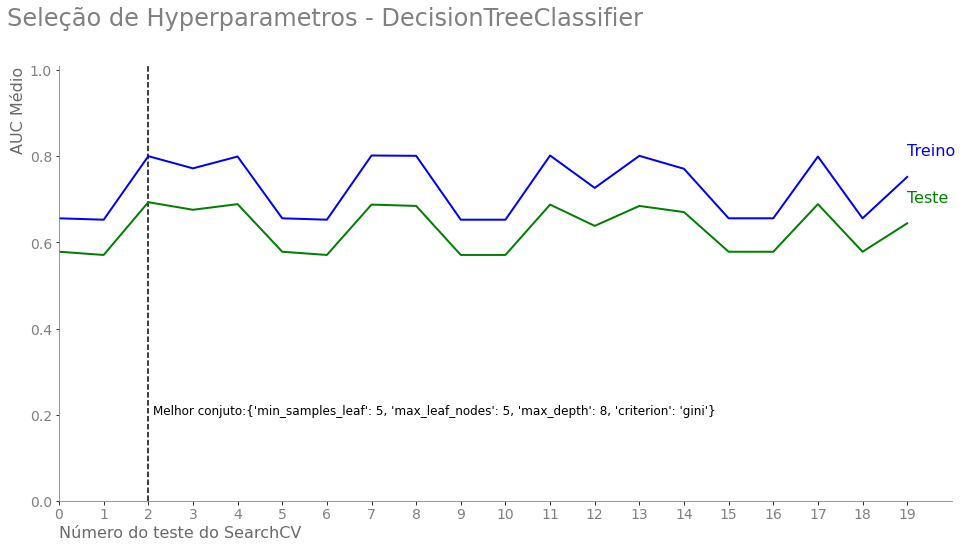

melhores hyperparametros : {'min_samples_leaf': 5, 'max_leaf_nodes': 5, 'max_depth': 8, 'criterion': 'gini'}
Melhor modelo            : DecisionTreeClassifier(max_depth=8, max_leaf_nodes=5, min_samples_leaf=5)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.578418,0.656085,0.048476,0.020319,0.006716,0.001843,0.005917,0.001507,12
1,"{'min_samples_leaf': 4, 'max_leaf_nodes': 2, '...",0.570984,0.652837,0.049637,0.023071,0.006036,0.001215,0.005432,0.000895,17
2,"{'min_samples_leaf': 5, 'max_leaf_nodes': 5, '...",0.693509,0.800404,0.068885,0.012994,0.007508,0.002599,0.006436,0.005467,1
3,"{'min_samples_leaf': 1, 'max_leaf_nodes': 4, '...",0.675923,0.772120,0.063869,0.014922,0.006657,0.000766,0.005458,0.000899,8
4,"{'min_samples_leaf': 3, 'max_leaf_nodes': 5, '...",0.688996,0.799558,0.068330,0.012559,0.006830,0.001282,0.005554,0.000721,2
5,"{'min_samples_leaf': 1, 'max_leaf_nodes': 2, '...",0.578418,0.656085,0.048476,0.020319,0.005949,0.000782,0.005477,0.000877,12
6,"{'min_samples_leaf': 4, 'max_leaf_nodes': 2, '...",0.570984,0.652837,0.049637,0.023071,0.006727,0.001038,0.005537,0.000853,17
7,"{'min_samples_leaf': 4, 'max_leaf_nodes': 5, '...",0.687931,0.801949,0.062378,0.014102,0.007895,0.000877,0.005617,0.000957,4
8,"{'min_samples_leaf': 1, 'max_leaf_nodes': 5, '...",0.684807,0.801218,0.062454,0.015128,0.008233,0.000951,0.005677,0.001066,6
9,"{'min_samples_leaf': 4, 'max_leaf_nodes': 3, '...",0.570984,0.652837,0.049637,0.023071,0.005771,0.000937,0.005377,0.000935,17


In [16]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_decision_tree

modelo = DecisionTreeClassifier()

melhor_modelo_arvore, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=False)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

---
## 4.4) Forest Tree

> Aqui será treinado do modelo **Forest Tree**. No treino foi usado **RandomizedSearchCV** com **20** iterações. Os hyperparametros foram:
>* n_estimators    : [100, 150, 200, 250, 300, 350, 400]
>* max_depth       : [1, 20]    
>* criterion       : [gini, entropy]
>* min_samples_leaf: [1-5]
>* max_leaf_nodes  : [2-10]


Fitting 50 folds for each of 20 candidates, totalling 1000 fits


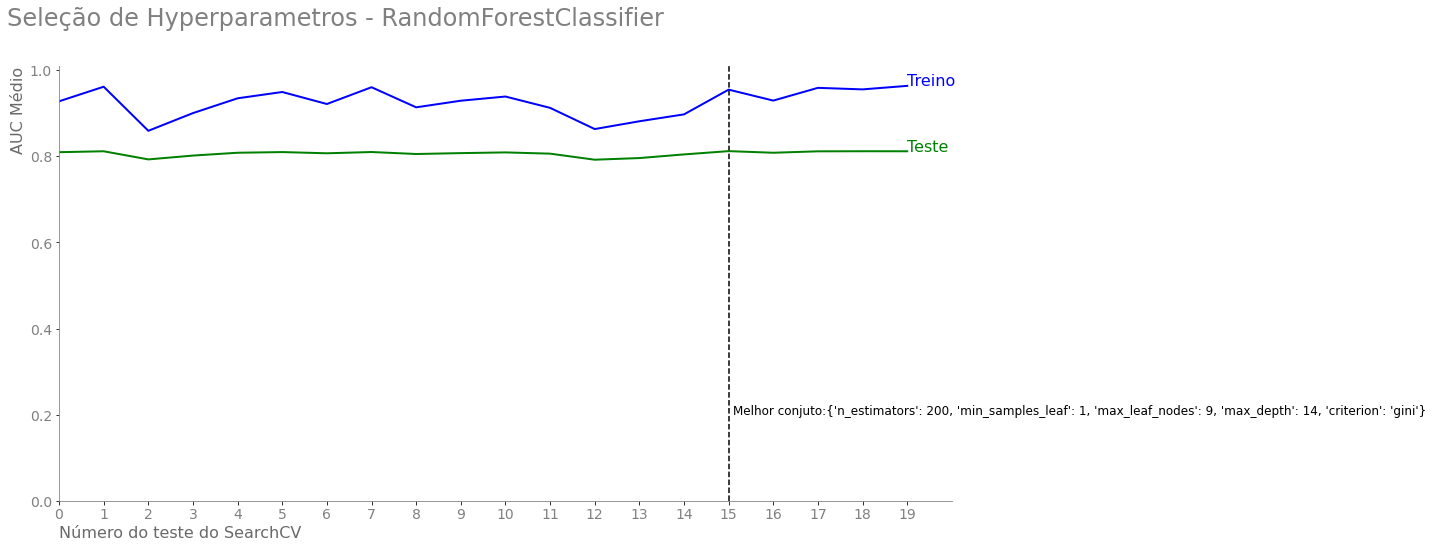

melhores hyperparametros : {'n_estimators': 200, 'min_samples_leaf': 1, 'max_leaf_nodes': 9, 'max_depth': 14, 'criterion': 'gini'}
Melhor modelo            : RandomForestClassifier(max_depth=14, max_leaf_nodes=9, n_estimators=200,
                       random_state=RandomState(MT19937) at 0x2BD0ECB3C40)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'n_estimators': 300, 'min_samples_leaf': 2, '...",0.809635,0.927827,0.047399,0.006503,0.774300,0.024198,0.066325,0.003383,8
1,"{'n_estimators': 250, 'min_samples_leaf': 2, '...",0.811785,0.961701,0.049889,0.005419,0.670002,0.039449,0.058759,0.010962,3
2,"{'n_estimators': 250, 'min_samples_leaf': 2, '...",0.792880,0.859330,0.049277,0.009115,0.601025,0.015922,0.055827,0.004369,19
3,"{'n_estimators': 150, 'min_samples_leaf': 3, '...",0.801805,0.900426,0.048201,0.007647,0.401170,0.017165,0.036861,0.003466,17
4,"{'n_estimators': 250, 'min_samples_leaf': 5, '...",0.808357,0.934797,0.048752,0.005809,0.682150,0.024471,0.056590,0.005385,10
5,"{'n_estimators': 400, 'min_samples_leaf': 1, '...",0.809899,0.949427,0.048601,0.005327,1.126051,0.035449,0.088539,0.011380,7
6,"{'n_estimators': 250, 'min_samples_leaf': 5, '...",0.807099,0.921547,0.049674,0.006457,0.676138,0.046855,0.059536,0.012597,13
7,"{'n_estimators': 100, 'min_samples_leaf': 3, '...",0.810041,0.960519,0.049271,0.005281,0.283780,0.013831,0.027002,0.002772,6
8,"{'n_estimators': 100, 'min_samples_leaf': 2, '...",0.805416,0.913831,0.047793,0.008291,0.261172,0.017614,0.027394,0.008950,15
9,"{'n_estimators': 350, 'min_samples_leaf': 3, '...",0.807485,0.929209,0.047984,0.006154,0.952834,0.031440,0.078179,0.013784,12


In [17]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_random_forest

modelo = RandomForestClassifier(random_state=rng)

melhor_modelo_forest, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=False)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

> 

## 4.5) Support Vector Classification.

> Aqui será treinado do modelo **SVC**. No treino foi usado **RandomizedSearchCV** com **20** iterações. Os hyperparametros de busca foram
>* kernel        : [linear, poly, rbf, sigmoid]
>* C             : [0, 2]
>* gamma         : [scale, auto]
>* shrinking     : [True , False]

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


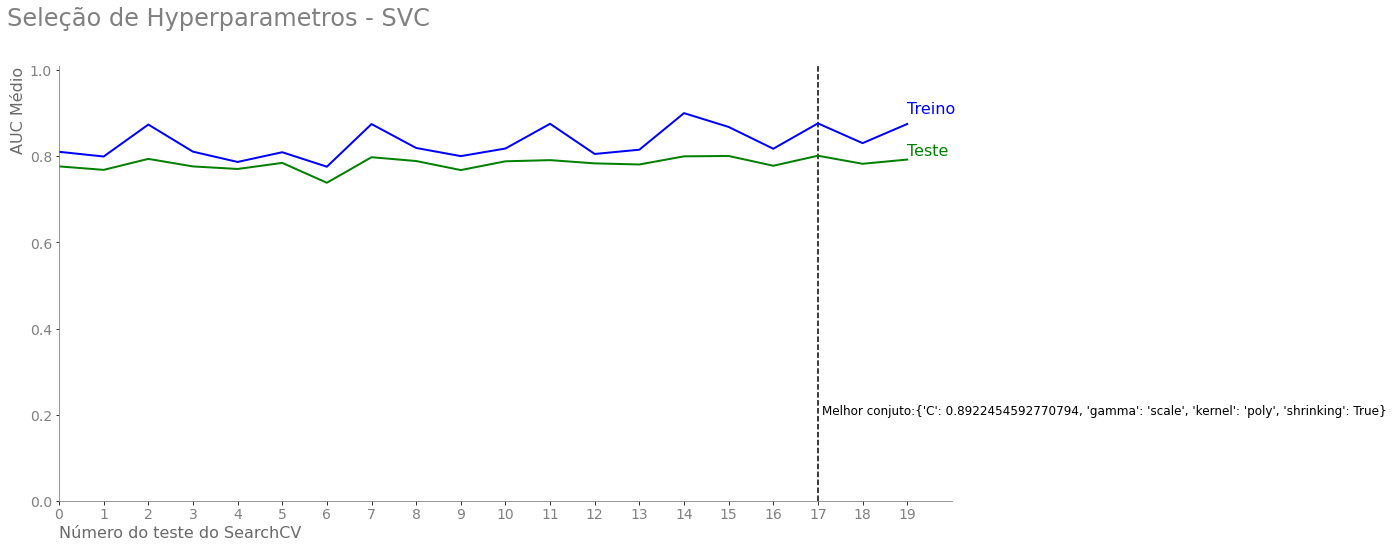

melhores hyperparametros : {'C': 0.8922454592770794, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}
Melhor modelo            : SVC(C=0.8922454592770794, kernel='poly', probability=True)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'C': 0.6087733678707163, 'gamma': 'auto', 'ke...",0.776673,0.810540,0.059354,0.011666,0.043625,0.002588,0.008609,0.000813,15
1,"{'C': 1.1919973308493834, 'gamma': 'auto', 'ke...",0.768580,0.799641,0.060598,0.011970,0.037572,0.006769,0.007296,0.001024,18
2,"{'C': 1.3414785453532363, 'gamma': 'scale', 'k...",0.794097,0.873816,0.049931,0.010863,0.030535,0.002781,0.006770,0.000987,5
3,"{'C': 0.6182682488506304, 'gamma': 'auto', 'ke...",0.776592,0.810862,0.059295,0.011644,0.043546,0.002375,0.009467,0.003620,16
4,"{'C': 0.09161178303222162, 'gamma': 'auto', 'k...",0.770649,0.786969,0.057996,0.011990,0.039265,0.001350,0.007159,0.000788,17
5,"{'C': 1.067968630753091, 'gamma': 'auto', 'ker...",0.784767,0.809546,0.056170,0.011242,0.031522,0.000826,0.006996,0.000916,10
6,"{'C': 1.537307483968221, 'gamma': 'scale', 'ke...",0.738621,0.775924,0.064481,0.014559,0.039188,0.001637,0.007246,0.000722,20
7,"{'C': 1.8286516557652102, 'gamma': 'scale', 'k...",0.797951,0.874939,0.053174,0.009249,0.041145,0.005785,0.008505,0.000898,4
8,"{'C': 1.9473655752001813, 'gamma': 'auto', 'ke...",0.789087,0.819449,0.055463,0.011465,0.030415,0.000930,0.006901,0.000878,8
9,"{'C': 1.264838942734859, 'gamma': 'auto', 'ker...",0.768114,0.800517,0.060632,0.012009,0.035947,0.001259,0.007170,0.000835,19


In [18]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_svc

modelo = SVC(probability=True)

melhor_modelo_svc, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=False)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

## 4.5) KNeighbors

> Aqui será treinado do modelo **KNeighbor**. No treino foi usado **RandomizedSearchCV** com **20** iterações. Os hyperparametros de busca foram
>* n_neighbors   : [1, 10]
>* p             : [1, 2]
>* weights       : [uniform, distance]
>* algorithm     : [auto, ball_tree, kd_tree, brute]

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


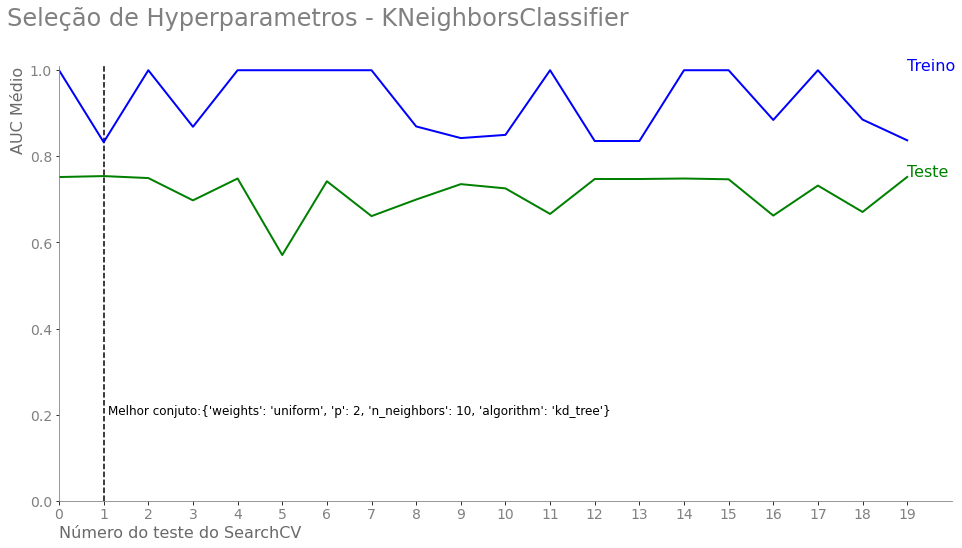

melhores hyperparametros : {'weights': 'uniform', 'p': 2, 'n_neighbors': 10, 'algorithm': 'kd_tree'}
Melhor modelo            : KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)


,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.751917,1.000000,0.061257,0.000000,0.006176,0.000864,0.007916,0.000867,3
1,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.754148,0.832887,0.060246,0.014025,0.007377,0.000744,0.008214,0.000750,1
2,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.749554,1.000000,0.059198,0.000000,0.004858,0.000824,0.007206,0.000617,4
3,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.697799,0.868682,0.061130,0.013765,0.004797,0.000632,0.006926,0.000721,15
4,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.748499,1.000000,0.061704,0.000000,0.006986,0.000695,0.008176,0.000654,5
5,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.570801,1.000000,0.049265,0.000000,0.006100,0.000755,0.007515,0.000853,20
6,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.742130,1.000000,0.060514,0.000000,0.004719,0.000662,0.007174,0.000885,10
7,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.661187,1.000000,0.066288,0.000000,0.004857,0.000774,0.006886,0.000832,19
8,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.699645,0.869471,0.061755,0.014640,0.007097,0.000701,0.008015,0.000649,14
9,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.735436,0.842413,0.055810,0.014993,0.004747,0.000512,0.006459,0.000606,11


In [19]:
rng = RandomState(MT19937(SeedSequence(seed)))

parameters = hp.parameters_KNeighbors

modelo = KNeighborsClassifier()

melhor_modelo_kn, res, melhor_metrica = treina(modelo = modelo,
                            x = x_cv, 
                            y = y_cv, 
                            parameters = parameters, 
                            n_splits = n_splits, 
                            n_repeats = n_repeats, 
                            n_iter = n_iter, 
                            n = 10,
                            rng=rng,
                            pasta_saida_fig='fig/',
                            f_save_fig=False)

melhores_metriacas_cv_por_modelo[obtem_nome_modelo(modelo)] =  melhor_metrica

res

# 5) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

In [20]:
modelos = [melhor_modelo_dummy, 
           melhor_modelo_lr, 
           melhor_modelo_arvore, 
           melhor_modelo_forest, 
           melhor_modelo_svc,
           melhor_modelo_kn] 

In [21]:
desempenho_dos_modelos(modelos, x_val, y_val)

,Name,tn,fp,fn,tp,AUC
0,RandomForestClassifier,12,7,5,12,0.783282
1,DecisionTreeClassifier,9,10,2,15,0.736842
2,SVC,12,7,6,11,0.733746
3,KNeighborsClassifier,16,3,10,7,0.699690
4,LogisticRegression,12,7,7,10,0.678019
5,DummyClassifier,10,9,7,10,0.577399


> **Tabela 5.1)** A Tabela acima são os resultados do modelo para o o conjunto de validação. O **RandomForestClassifier** que obteve o melhor resultado, com o número de **falso negativos** (FN) e **falso positivos** (FP) relaticamente baixos. O segundo melhor foi **DecisionTreeClassifier**, o DecisionTreeClassifier também foi o que obteve o menor numero de **falso negativos** (FN) em contra partida ele obtive o maior número de **falso positivos** (FP).

In [22]:
desempenho_cv_por_modelo = pd.DataFrame(melhores_metriacas_cv_por_modelo).T.sort_values('media', ascending=False)
desempenho_cv_por_modelo

,media,std
RandomForestClassifier,0.812089,0.049321
LogisticRegression,0.801785,0.050145
SVC,0.801420,0.051126
KNeighborsClassifier,0.754148,0.060246
DecisionTreeClassifier,0.693509,0.068885


> A tabela acima são os resutados da media dos teste para etapa de **Cross Validation**. Novamente **RandomForestClassifier** tem o melhor resultado. Agora o segundo é o **LogisticRegression**. O **DecisionTreeClassifier** foi o ultimo. O desvio padrão da média estão bem próximos um do outro, logo basta olhar apenas para médias sem se preocupar com o intervalos 

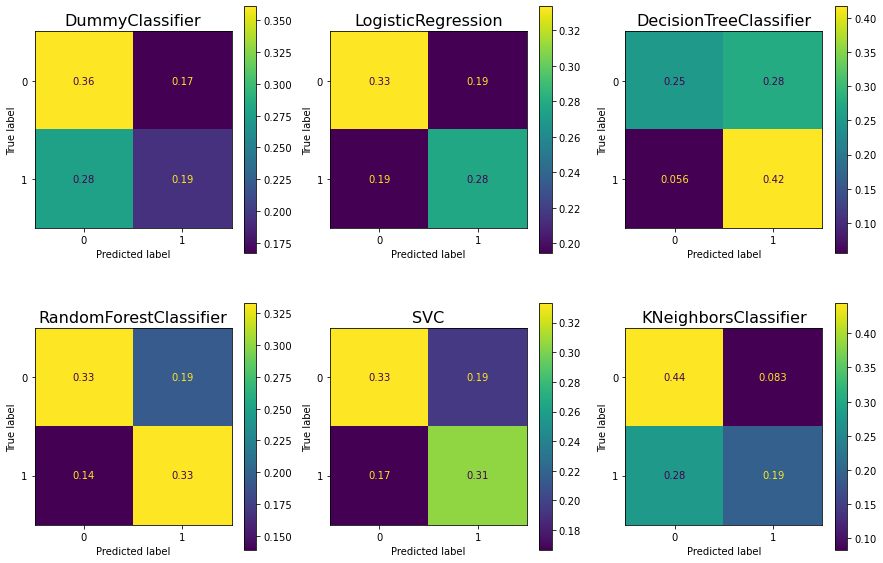

In [23]:
plota_matriz_de_confusao(modelos, x_val, y_val)

> **Fig 5.1)** A Matriz de confusão normalizado dos modelos. Essa figura é apenas uma outra forma de representar a **Tabela 5.1**.

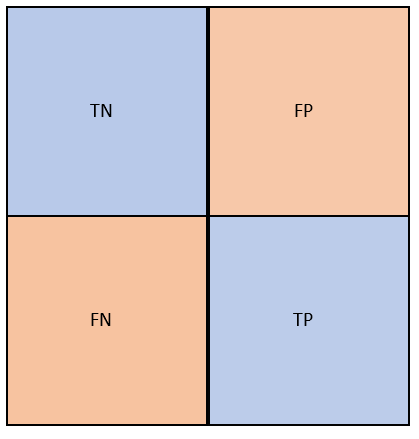
**Fig 5.2)** Quadrantes da Matriz de Confusão

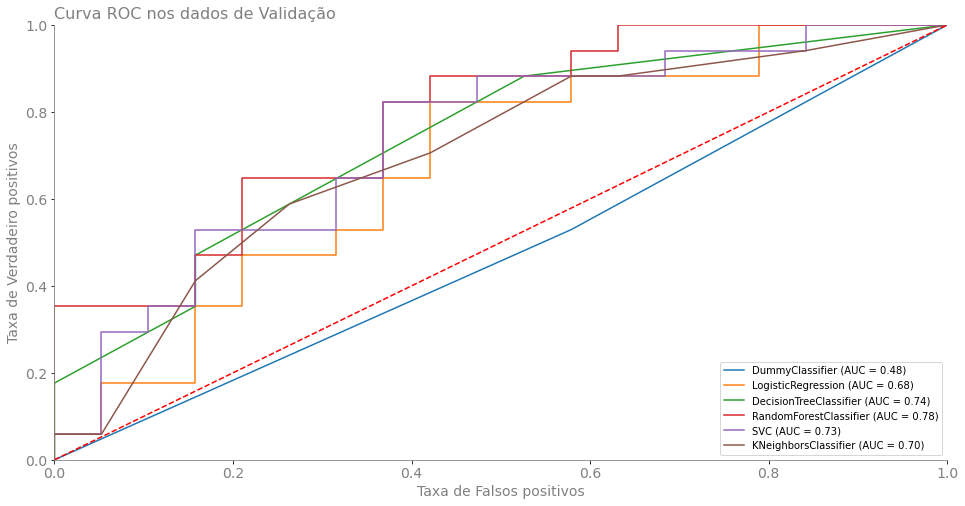

In [24]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Validação', x=x_val, y=y_val)

> **Fig 5.3)** A curva ROC dos modelos para os dados de validação, estas curvas estão diretamente relacionados a **Tabela 5.1)**. No gráfico observa-se que DummyClassifier estão na diagonal do gráfico como esperado. O **RandomForestClassifier** é a melhor curva. Porém como temos apenas 36 dados para validação a curvas ficam dificies de analisar.   

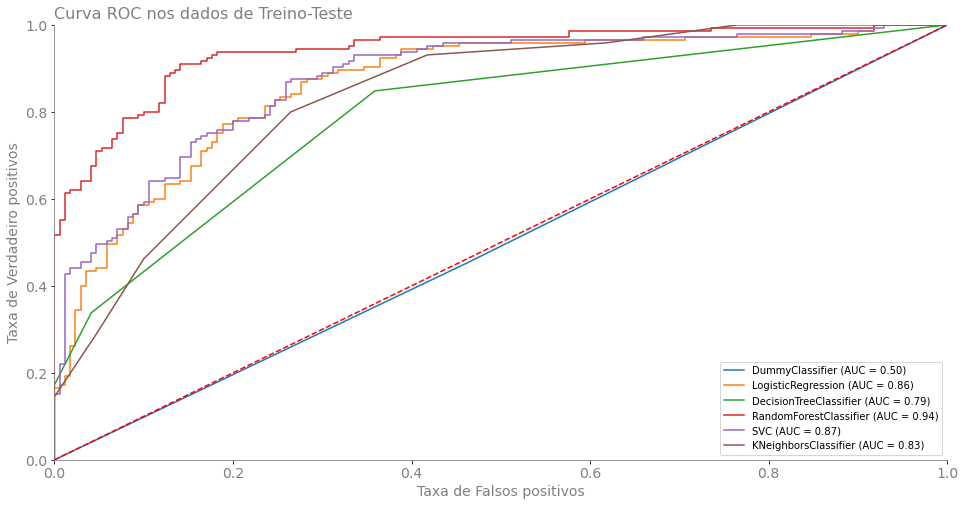

In [25]:
plota_curva_roc(modelos, titulo='Curva ROC nos dados de Treino-Teste', x=x_cv, y=y_cv)

> **Fig 5.4)** A curva ROC dos modelos para os dados usados na **Cross Validation** (teste+treino). Este gráfico não pode ser usado para avaliar o modelo pois o modelo final foi re-treina com todos os dados da **Cross Validation** depois que o melhor hyperparametro foi achado. As curvas apenas indicam quão bem os modelos se adequão ao dados de treinamento.
  

# 6) Conclusão

> Em todas as metricas o **RandomForestClassifier** foi o melhor modelo. O melhor conjuto de hyperparametros foi:
>* n_estimators    : [300]
>* max_depth       : [17]    
>* criterion       : [gini]
>* min_samples_leaf: [2]
>* max_leaf_nodes  : [9]

> Penas uma escolha de conjuto de varivaies explicativas foi feita aqui, no próximo notebook [LINK] outras passibilidades de variaveis explicativas foram testadas.

> O **DecisionTreeClassifier** foi o melhor em termo de **falso negativos**, apenas **2** na base de validação, porém ele foi pior modelo no **Cross Validation**. Isso pode indicar que o bom desempenho da base de validação foi apenas sorte.

> Aqui não foi avaliado do tempo para o treino de cada modelo. Para bases maiores isso pode ser outro fator de escolha para o melhor modelo.

---
Navegação:

---
[Voltar para o Notebook anterior (Limpeza de Dados)](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Selecao_variaveis/selecao_variaveis.ipynb)

[Ir para o proximo notebook (Treinamentos com varias escolhas de variaveis explicativas)](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/ML/treina_diferentes_var_explicativas.ipynb)

---
[Exploração e limpeza de dados](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final/blob/main/Notebooks/Exploratorios/explaracao_limpezada.ipynb)

[Retornar para README principal](https://github.com/HenriqueCCdA/BC_DS_Projeto_Final)

---